# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Observations
- Of the 517 countries that I analized, the humidity seems high throughout these countries.The average humidity is
  71.91%.
- Analizing the graphs, there is not much of a correlation between latitude and cloudiness. Nor is there a correlation between latitude and humidity.
- The majority of the cities have between 0 and 15 mph wind speed. The extreme cities are found in the Northern Hemisphere (more than 25 mph).

In [6]:
# Dependencies
import json
import requests
import pandas as pd
from api_keys import weather_api_key
#from api_keys import g_key
from pprint import pprint
from citipy import citipy
import random
import csv
import matplotlib.pyplot as plt
import scipy.stats as st

## Generate Cities List

In [7]:
city_list = []
max_city = 1300
for x in range(max_city):
    long=random.uniform(180,-180)
    lat =random.uniform(90,-90)
    city=citipy.nearest_city(lat,long)
    city_name=city.city_name
        
    if city_name not in city_list:
        city_list.append(city_name)
            
print (f'Total: {len(city_list)} cities')      

Total: 558 cities


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

cities_per_set = 50
counting_set = 1
total = 0
current_set = 0

v_name = []
v_latitude= []
v_longitude = []
v_temp_max = []
v_humidity = []
v_cloudiness=[]
v_wind_speed=[]
v_country=[]
v_date=[]

print('Beginning Data Retrieval')
print('----------------------------------')
# Loop through each city on the list
for city in city_list:
    current_set += 1
    if current_set > cities_per_set:
        counting_set += 1
        current_set = 1
    
    total += 1

# Build query URL and request your results in Celsius
# query_url = f"{url}appid={weather_api_key} &q={city}&units={units}"
    query_url = f"{url}&q={city}&appid={weather_api_key}&units={units}"

    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    # Try to grab the height and mass of characters if they are available in the Star Wars API
    try:
        v_name.append(weather_json["name"])
        v_latitude.append(weather_json["coord"]["lat"])
        v_longitude.append(weather_json["coord"]["lon"])
        v_temp_max.append(weather_json["main"]["temp_max"])
        v_humidity.append(weather_json["main"]["humidity"])
        v_cloudiness.append(weather_json["clouds"]["all"])
        v_wind_speed.append(weather_json["wind"]["speed"])
        v_country.append(weather_json["sys"]["country"])
        v_date.append(weather_json["dt"])
                                    
        print(f'Processsing Record {total} of Set {counting_set} | {city}' )
           
    # Handle exceptions for a city that does not exist on openweathermap
    except:   
        print("City not found. Skipping...")
        pass
print('----------------------------------')
print('Data Retrieval Completed ')



Beginning Data Retrieval
----------------------------------
Processsing Record 1 of Set 1 | iqaluit
City not found. Skipping...
Processsing Record 3 of Set 1 | busselton
City not found. Skipping...
Processsing Record 5 of Set 1 | leningradskiy
Processsing Record 6 of Set 1 | lagoa
Processsing Record 7 of Set 1 | lebu
Processsing Record 8 of Set 1 | bluff
Processsing Record 9 of Set 1 | rikitea
Processsing Record 10 of Set 1 | udachnyy
Processsing Record 11 of Set 1 | kargopol
Processsing Record 12 of Set 1 | esperance
Processsing Record 13 of Set 1 | mayo
Processsing Record 14 of Set 1 | vestmannaeyjar
Processsing Record 15 of Set 1 | albany
Processsing Record 16 of Set 1 | qaanaaq
Processsing Record 17 of Set 1 | noumea
Processsing Record 18 of Set 1 | awjilah
Processsing Record 19 of Set 1 | dawei
Processsing Record 20 of Set 1 | punta arenas
Processsing Record 21 of Set 1 | puerto escondido
Processsing Record 22 of Set 1 | emba
Processsing Record 23 of Set 1 | suntar
City not found.

Processsing Record 198 of Set 4 | warrnambool
City not found. Skipping...
Processsing Record 200 of Set 4 | bapatla
Processsing Record 201 of Set 5 | sarankhola
Processsing Record 202 of Set 5 | dingle
Processsing Record 203 of Set 5 | kuznechnoye
Processsing Record 204 of Set 5 | dikson
Processsing Record 205 of Set 5 | saskylakh
Processsing Record 206 of Set 5 | skowhegan
Processsing Record 207 of Set 5 | kruisfontein
Processsing Record 208 of Set 5 | saint-francois
Processsing Record 209 of Set 5 | edmundston
Processsing Record 210 of Set 5 | tuatapere
City not found. Skipping...
City not found. Skipping...
Processsing Record 213 of Set 5 | yeniseysk
City not found. Skipping...
Processsing Record 215 of Set 5 | san patricio
Processsing Record 216 of Set 5 | plettenberg bay
Processsing Record 217 of Set 5 | santa marta
Processsing Record 218 of Set 5 | ous
Processsing Record 219 of Set 5 | itaituba
Processsing Record 220 of Set 5 | eureka
Processsing Record 221 of Set 5 | te anau
Pro

Processsing Record 394 of Set 8 | emerald
Processsing Record 395 of Set 8 | port lincoln
Processsing Record 396 of Set 8 | marzuq
Processsing Record 397 of Set 8 | birao
Processsing Record 398 of Set 8 | tomatlan
Processsing Record 399 of Set 8 | baykit
Processsing Record 400 of Set 8 | kavieng
Processsing Record 401 of Set 9 | port hedland
Processsing Record 402 of Set 9 | hofn
Processsing Record 403 of Set 9 | high level
Processsing Record 404 of Set 9 | porkhov
Processsing Record 405 of Set 9 | atambua
Processsing Record 406 of Set 9 | doha
Processsing Record 407 of Set 9 | ribeirao preto
Processsing Record 408 of Set 9 | pitimbu
Processsing Record 409 of Set 9 | nanpiao
Processsing Record 410 of Set 9 | smithers
Processsing Record 411 of Set 9 | huarmey
Processsing Record 412 of Set 9 | raudeberg
Processsing Record 413 of Set 9 | alexandria
Processsing Record 414 of Set 9 | hauterive
Processsing Record 415 of Set 9 | dinga
Processsing Record 416 of Set 9 | sao joao da barra
Process

In [9]:
# created a DataFrame
weather_cities_df =pd.DataFrame({            'city':v_name,
                                         'latitude' :v_latitude,
                                        'longitude' :v_longitude,
                                         'temp_max' :v_temp_max,
                                         'humidity' :v_humidity,
                                        'cloudiness':v_cloudiness,
                                        'wind_speed':v_wind_speed,
                                          'country':v_country,
                                            'date'  :v_date
                               })

weather_cities_df.reset_index()

,index,city,latitude,longitude,temp_max,humidity,cloudiness,wind_speed,country,date
0,0,Iqaluit,63.75,-68.51,10.40,78,40,6.93,CA,1604187707
1,1,Busselton,-33.65,115.33,60.01,78,100,1.34,AU,1604187949
2,2,Leningradskiy,69.38,178.42,17.02,89,53,7.67,RU,1604187974
3,3,Lagoa,39.05,-27.98,68.38,93,64,24.20,PT,1604187992
4,4,Lebu,-37.62,-73.65,52.36,89,8,8.70,CL,1604187964
...,...,...,...,...,...,...,...,...,...,...
512,512,Ranong,9.97,98.63,75.20,100,20,1.25,TH,1604188475
513,513,Christchurch,-43.53,172.63,63.00,67,51,17.22,NZ,1604188175
514,514,Morant Bay,17.88,-76.41,82.40,83,40,6.93,JM,1604188332
515,515,Rørvik,64.86,11.24,49.06,68,98,31.32,NO,1604187972


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#export the city data into a .csv.
#weather_cities_df.to_csv("Output/weather_city.csv", index=False, header=True)

#Display the DataFrame
weather_cities_df

,city,latitude,longitude,temp_max,humidity,cloudiness,wind_speed,country,date
0,Iqaluit,63.75,-68.51,10.40,78,40,6.93,CA,1604187707
1,Busselton,-33.65,115.33,60.01,78,100,1.34,AU,1604187949
2,Leningradskiy,69.38,178.42,17.02,89,53,7.67,RU,1604187974
3,Lagoa,39.05,-27.98,68.38,93,64,24.20,PT,1604187992
4,Lebu,-37.62,-73.65,52.36,89,8,8.70,CL,1604187964
...,...,...,...,...,...,...,...,...,...
512,Ranong,9.97,98.63,75.20,100,20,1.25,TH,1604188475
513,Christchurch,-43.53,172.63,63.00,67,51,17.22,NZ,1604188175
514,Morant Bay,17.88,-76.41,82.40,83,40,6.93,JM,1604188332
515,Rørvik,64.86,11.24,49.06,68,98,31.32,NO,1604187972


In [11]:
#created a dataframe to inspect the data
weather_cities_re = weather_cities_df[['latitude','longitude','temp_max','humidity','cloudiness','wind_speed','date']]

#  Get the indices of cities that have humidity over 100%.
weather_cities_out = pd.DataFrame ({'count':weather_cities_re.count(),
                                    'mean':weather_cities_re.mean(),
                                    'std':weather_cities_re.std(),
                                    'min':weather_cities_re.min(),
                                    '25%':weather_cities_re.quantile(.25),
                                    '50%':weather_cities_re.quantile(.5),
                                    '75%':weather_cities_re.quantile(.75),
                                    'max':weather_cities_re.max(),
                                   })
weather_cities_out.T

,latitude,longitude,temp_max,humidity,cloudiness,wind_speed,date
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,5.170000e+02
mean,19.859400,22.984023,57.986731,71.696325,49.102515,7.992863,1.604188e+09
std,33.645392,91.482422,22.754397,20.802659,38.937875,5.981052,2.263164e+02
min,-54.800000,-179.170000,-14.710000,10.000000,0.000000,0.360000,1.604188e+09
25%,-7.470000,-58.620000,42.800000,62.000000,2.000000,3.360000,1.604188e+09
50%,24.090000,26.890000,64.400000,76.000000,51.000000,6.930000,1.604188e+09
75%,48.010000,105.320000,77.000000,87.000000,90.000000,11.180000,1.604188e+09
max,78.220000,179.320000,91.000000,100.000000,100.000000,44.960000,1.604188e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
# check the humidity > 100%
humidity_upper_df = weather_cities_df
humidity_upper_df = humidity_upper_df.loc[humidity_upper_df['humidity'] > 100]

In [13]:
# display the dataframe with 'humidity' > 100
humidity_upper_df

,city,latitude,longitude,temp_max,humidity,cloudiness,wind_speed,country,date


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
count_humidity=humidity_upper_df.groupby('city').count()['humidity'].sum()

# if there is data with humidity > 100 drop that data
if count_humidity > 0:
    clean_city_data=weather_cities_df.drop(humidity_upper_df.index,inplace=False)
    weather_cities_df =clean_city_data


In [15]:
#created a dataframe to inspect the data after dropping the data
weather_cities_re = weather_cities_df[['latitude','longitude','temp_max','humidity','cloudiness','wind_speed','date']]

weather_cities_out = pd.DataFrame ({'count':weather_cities_re.count(),
                                    'mean':weather_cities_re.mean(),
                                    'std':weather_cities_re.std(),
                                    'min':weather_cities_re.min(),
                                    '25%':weather_cities_re.quantile(.25),
                                    '50%':weather_cities_re.quantile(.5),
                                    '75%':weather_cities_re.quantile(.75),
                                    'max':weather_cities_re.max(),
                                   })
weather_cities_out.T


,latitude,longitude,temp_max,humidity,cloudiness,wind_speed,date
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,5.170000e+02
mean,19.859400,22.984023,57.986731,71.696325,49.102515,7.992863,1.604188e+09
std,33.645392,91.482422,22.754397,20.802659,38.937875,5.981052,2.263164e+02
min,-54.800000,-179.170000,-14.710000,10.000000,0.000000,0.360000,1.604188e+09
25%,-7.470000,-58.620000,42.800000,62.000000,2.000000,3.360000,1.604188e+09
50%,24.090000,26.890000,64.400000,76.000000,51.000000,6.930000,1.604188e+09
75%,48.010000,105.320000,77.000000,87.000000,90.000000,11.180000,1.604188e+09
max,78.220000,179.320000,91.000000,100.000000,100.000000,44.960000,1.604188e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

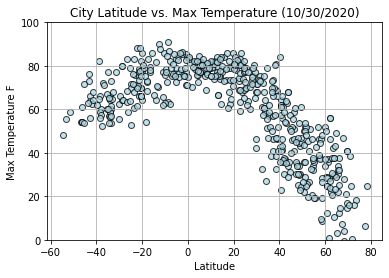

In [49]:
# Create a scatter plot which compares Latitude vs Temperature
plt.scatter(weather_cities_df["latitude"],weather_cities_df["temp_max"],marker="o", edgecolors="black",facecolors="lightblue",
            alpha=0.75)
plt.grid()
plt.title('City Latitude vs. Max Temperature (10/30/2020)')
plt.xlabel('Latitude')
plt.ylabel("Max Temperature F")
plt.ylim(0, 100)
plt.savefig("../WeatherPy/Images/LatitudVsTemp.png")
plt.show()


###Analyzing the relationship between latitude and temperature of 500+ countries all over the world

## Latitude vs. Humidity Plot

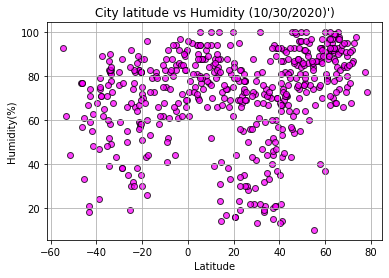

In [48]:
plt.scatter(weather_cities_df["latitude"], weather_cities_df["humidity"], marker = 'o', edgecolor = 'black',facecolor ='magenta',
            alpha=0.75)
plt.grid()
plt.title("City latitude vs Humidity (10/30/2020)')")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("../WeatherPy/Images/LatitudVsHumidity.png")
plt.show()


###Analyzing the relationship between latitude and humidity of 500+ countries all over the world.

## Latitude vs. Cloudiness Plot

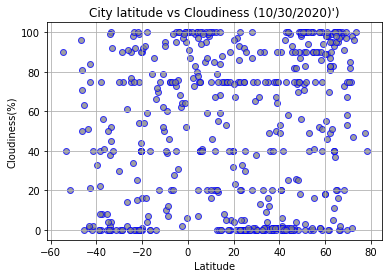

In [47]:
plt.scatter(weather_cities_df["latitude"], weather_cities_df["cloudiness"], marker = 'o', edgecolor = 'blue',facecolor ='grey',
            alpha=0.75)
plt.grid()
plt.title("City latitude vs Cloudiness (10/30/2020)')")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("../WeatherPy/Images/LatitudVsCloudiness.png")
plt.show()

###Analyzing the relationship between latitude and cloudiness of 500+ countries all over the world.

## Latitude vs. Wind Speed Plot

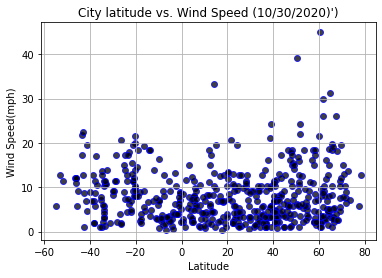

In [50]:
plt.scatter(weather_cities_df["latitude"], weather_cities_df["wind_speed"], marker = 'o', edgecolor = 'blue',facecolor ='black',
            alpha=0.75)
plt.grid()
plt.title("City latitude vs. Wind Speed (10/30/2020)')")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.savefig("../WeatherPy/Images/LatitudVsWindSpeed.png")
plt.show()

###Analyzing the relationship between Latitude and Wind Speed of 500+ countries all over the world.

## Linear Regression

In [31]:
northern_hemisphere_df = weather_cities_df.loc[weather_cities_df.latitude > 0]
southern_hemisphere_df = weather_cities_df.loc[weather_cities_df.latitude < 0]
xlatitude_nh = northern_hemisphere_df['latitude']
xlatitude_sh = southern_hemisphere_df['latitude']


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8563843065696987


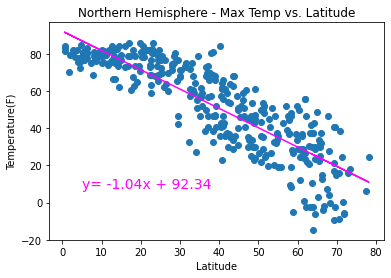

In [41]:
ytemperature = northern_hemisphere_df['temp_max']
correlation = st.pearsonr(xlatitude_nh,ytemperature)

# Perform a linear regression on temperature vs. latitude
tl_slope, tl_intercept, tl_rvalue, tl_pvalue, tl_std_err = st.linregress(xlatitude_nh, ytemperature)

# print the r-value
print(f"The r-value is {tl_rvalue}")

# Get regression values
tl_equation = tl_slope * xlatitude_nh + tl_intercept

# Create line equation string
equation = (f'y= {round(tl_slope,2)}x + {round(tl_intercept,2)}')

# Create Plot
plt.scatter(xlatitude_nh,ytemperature)
plt.plot(xlatitude_nh,tl_equation,color='magenta')

# setting titles and labels
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.annotate(equation,(5,8),fontsize=14,color='magenta')

# save image
plt.savefig("../WeatherPy/Images/NHLatitudVsTemp.png")

# Show plot
plt.show()


##In the Northern Hemisphere there is a high probability that temperatures are explained by the latidude. Looking at the 
r-value we can notice that.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.64


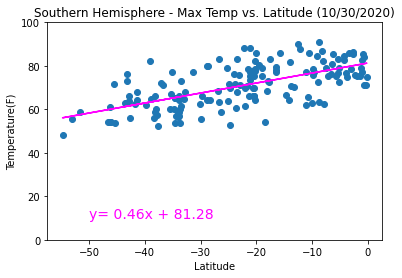

In [33]:
ytemperature_sh = southern_hemisphere_df['temp_max']

# Get regression values
tl_slope_sh, tl_intercept_sh, tl_rvalue_sh, tl_pvalue_sh, tl_std_err_sh = st.linregress(xlatitude_sh, ytemperature_sh)

# print the r-value
print(f"The r-value is {round(tl_rvalue_sh,2)}")
 

# Perform a linear regression on temperature vs. latitude
tl_equation_sh = tl_slope_sh * xlatitude_sh + tl_intercept_sh

# Create line equation string
equation_sh = (f'y= {round(tl_slope_sh,2)}x + {round(tl_intercept_sh,2)}')

# Create Plot
plt.scatter(xlatitude_sh,ytemperature_sh)
plt.plot(xlatitude_sh,tl_equation_sh,color='magenta')

# setting titles and labels
plt.title('Southern Hemisphere - Max Temp vs. Latitude (10/30/2020)')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.ylim(0, 100)
plt.annotate(equation_sh,(-50,10),fontsize=14,color='magenta')

#save image
plt.savefig("../WeatherPy/Images/SHLatitudVsTemp.png")

# Show plot
plt.show()


###In the Southern Hemisphere there is a high probability that temperatures are explained by the latidude. Looking at the r-value we can notice that also.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.23


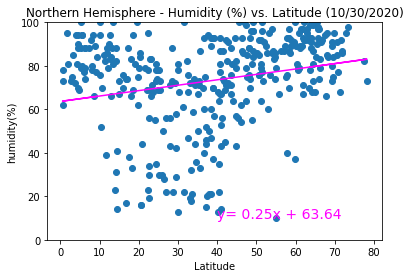

In [34]:
yhumidity_nh = northern_hemisphere_df['humidity']

# Get regression values
hl_slope_nh, hl_intercept_nh, hl_rvalue_nh, hl_pvalue_nh, hl_std_err_nh = st.linregress(xlatitude_nh, yhumidity_nh)

# print the r-value
print(f"The r-value is {round(hl_rvalue_nh,2)}")
 

# Perform a linear regression on Humidity vs. latitude
hl_equation_nh = hl_slope_nh * xlatitude_nh + hl_intercept_nh

# Create line equation string
equation_hl_nh = (f'y= {round(hl_slope_nh,2)}x + {round(hl_intercept_nh,2)}')

# Create Plot
plt.scatter(xlatitude_nh,yhumidity_nh)
plt.plot(xlatitude_nh,hl_equation_nh,color='magenta')

# setting titles and labels
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude (10/30/2020)')
plt.xlabel('Latitude')
plt.ylabel('humidity(%)')
plt.ylim(0, 100)
plt.annotate(equation_hl_nh,(40,10),fontsize=14,color='magenta')

#save image
plt.savefig("../WeatherPy/Images/NHLatVsHumidity.png")

# Show plot
plt.show()


####Northern Hemisphere - The humidity is more dispersed than together.There is a low probability that humidity is explained by the latidude. The r-value also shows us a low probability.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.28


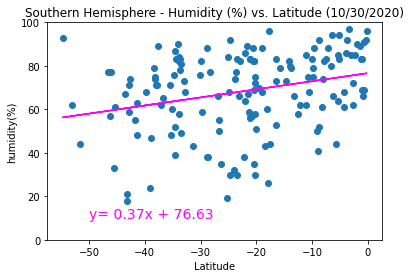

In [35]:
yhumidity_sh = southern_hemisphere_df['humidity']

# Get regression values
hl_slope_sh, hl_intercept_sh, hl_rvalue_sh, hl_pvalue_sh, hl_std_err_sh = st.linregress(xlatitude_sh, yhumidity_sh)


# print the r-value
print(f"The r-value is {round(hl_rvalue_sh,2)}")
 
# Perform a linear regression on Humidity vs. latitude
hl_equation_sh = hl_slope_sh * xlatitude_sh + hl_intercept_sh

# Create line equation string
equation_hl_sh = (f'y= {round(hl_slope_sh,2)}x + {round(hl_intercept_sh,2)}')

# Create Plot
plt.scatter(xlatitude_sh,yhumidity_sh)
plt.plot(xlatitude_sh,hl_equation_sh,color='magenta')

# setting titles and labels
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude (10/30/2020)')
plt.xlabel('Latitude')
plt.ylabel('humidity(%)')
plt.ylim(0, 100)
plt.annotate(equation_hl_sh,(-50,10),fontsize=14,color='magenta')

#save image
plt.savefig("../WeatherPy/Images/SHLatVsHumidity.png")

# Show plot
plt.show()


####Southern Hemisphere - The humidity is more dispersed than together.There is a low probability that humidity is 
explained by the latidude. The r-value also shows us a low probability.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.1


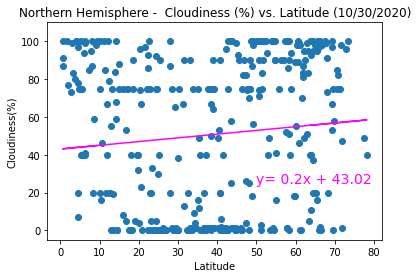

In [36]:
ycloudiness_nh = northern_hemisphere_df['cloudiness']

# Get regression values
cl_slope_nh, cl_intercept_nh, cl_rvalue_nh, cl_pvalue_nh, cl_std_err_nh = st.linregress(xlatitude_nh, ycloudiness_nh)

# print the r-value
print(f"The r-value is {round(cl_rvalue_nh,2)}")

# Perform a linear regression on Cloudiness vs. latitude
cl_equation_nh = cl_slope_nh * xlatitude_nh + cl_intercept_nh

# Create line equation string
equation_cl_nh = (f'y= {round(cl_slope_nh,2)}x + {round(cl_intercept_nh,2)}')

# Create Plot
plt.scatter(xlatitude_nh,ycloudiness_nh)
plt.plot(xlatitude_nh,cl_equation_nh,color='magenta')

# setting titles and labels
plt.title('Northern Hemisphere -  Cloudiness (%) vs. Latitude (10/30/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.ylim(-5, 110)
plt.annotate(equation_cl_nh,(50,25),fontsize=14,color='magenta')

#save image
plt.savefig("../WeatherPy/Images/NHCloudinessVsLat.png")

# Show plot
plt.show()

Northern Hemisphere - There is very low probability that cloudiness depends on latitude. The r-value is very low (0.1).

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.31


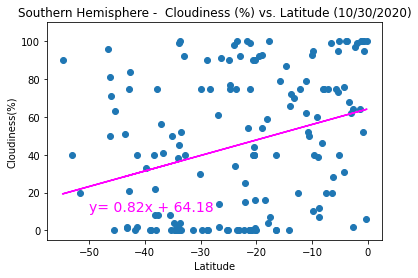

In [37]:
ycloudiness_sh = southern_hemisphere_df['cloudiness']

# Get regression values
cl_slope_sh, cl_intercept_sh, cl_rvalue_sh, cl_pvalue_sh, cl_std_err_sh = st.linregress(xlatitude_sh, ycloudiness_sh)

# print the r-value
print(f"The r-value is {round(cl_rvalue_sh,2)}")

# Perform a linear regression on Cloudiness vs. latitude
cl_equation_sh = cl_slope_sh * xlatitude_sh + cl_intercept_sh

# Create line equation string
equation_cl_sh = (f'y= {round(cl_slope_sh,2)}x + {round(cl_intercept_sh,2)}')

# Create Plot
plt.scatter(xlatitude_sh,ycloudiness_sh)
plt.plot(xlatitude_sh,cl_equation_sh,color='magenta')

# setting titles and labels
plt.title('Southern Hemisphere -  Cloudiness (%) vs. Latitude (10/30/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.ylim(-5, 110)
plt.annotate(equation_cl_sh,(-50,10),fontsize=14,color='magenta')

#save image
plt.savefig("../WeatherPy/Images/SHCloudinessVsLat.png")

# Show plot
plt.show()

Southern Hemisphere - Same as the Northern Hemisphere there is very low probability that cloudiness depends on latitude. The r-value is low (0.31).

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.18


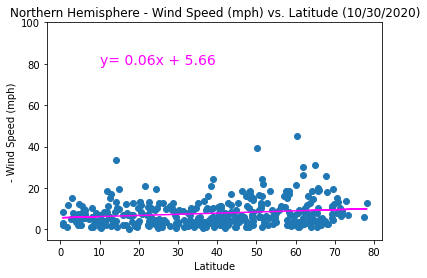

In [38]:
ywind_nh = northern_hemisphere_df['wind_speed']

# Get regression values
wl_slope_nh, wl_intercept_nh, wl_rvalue_nh, wl_pvalue_nh, wl_std_err_nh = st.linregress(xlatitude_nh, ywind_nh)

# print the r-value
print(f"The r-value is {round(wl_rvalue_nh,2)}")

# Perform a linear regression on Wind Speed  vs. latitude
wl_equation_nh = wl_slope_nh * xlatitude_nh + wl_intercept_nh

# Create line equation string
equation_wl_nh = (f'y= {round(wl_slope_nh,2)}x + {round(wl_intercept_nh,2)}')

# Create Plot
plt.scatter(xlatitude_nh,ywind_nh)
plt.plot(xlatitude_nh,wl_equation_nh,color='magenta')

# setting titles and labels
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude (10/30/2020)')
plt.xlabel('Latitude')
plt.ylabel('- Wind Speed (mph)')
plt.ylim(-5, 100)
plt.annotate(equation_wl_nh,(10,80),fontsize=14,color='magenta')

#save image
plt.savefig("../WeatherPy/Images/NHWindSpeedVsLat.png")

# Show plot
plt.show()

##Northern Hemisphere - The wind speed is not affected by the latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.26


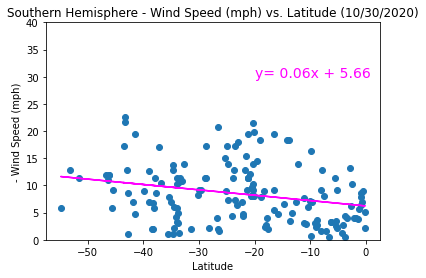

In [39]:
ywind_sh = southern_hemisphere_df['wind_speed']

# Get regression values
wl_slope_sh, wl_intercept_sh, wl_rvalue_sh, wl_pvalue_sh, wl_std_err_sh = st.linregress(xlatitude_sh, ywind_sh)

# print the r-value
print(f"The r-value is {round(wl_rvalue_sh,2)}")

# Perform a linear regression on Wind Speed vs. latitude
wl_equation_sh = wl_slope_sh * xlatitude_sh + wl_intercept_sh

# Create line equation string
equation_wl_sh = (f'y= {round(wl_slope_sh,2)}x + {round(wl_intercept_sh,2)}')

# Create Plot
plt.scatter(xlatitude_sh,ywind_sh)
plt.plot(xlatitude_sh,wl_equation_sh,color='magenta')

# setting titles and labels
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude (10/30/2020)')
plt.xlabel('Latitude')
plt.ylabel('- Wind Speed (mph)')
plt.ylim(0, 40)
plt.annotate(equation_wl_nh,(-20,30),fontsize=14,color='magenta')

#save image
plt.savefig("../WeatherPy/Images/SHWindSpeedVsLat.png")

# Show plot
plt.show()

##Southern Hemisphere - The wind speed is not affected by the latitude also. But, the wind speeds are higher in the Southern Hemisphere than the Northen Hemisphere.